# 디지털 영상 기초 84쪽

In [6]:
!pip install opencv-python
!pip install scikit-image



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import cv2
import sys
from IPython.display import display, Image



img = cv2.imread("soccer.jpg")

if img is None: 
    sys.exit("파일을 찾을 수 없습니다.")
    
cv2.imshow('original_RGB', img)
cv2.imshow("upper left half", img[0:img.shape[0]//2, 0:img.shape[1]//2,:])
cv2.imshow("central half", img[img.shape[0]//4:3*img.shape[0]//4, img.shape[1]//4:3*img.shape[1]//4,:])


cv2.imshow('R channel', img[:,:,2])
cv2.imshow('G channel', img[:,:,1])
cv2.imshow('B channel', img[:,:,0])

cv2.waitKey()
cv2.destroyAllWindows()

# 모폴로지 연산자 적영하기

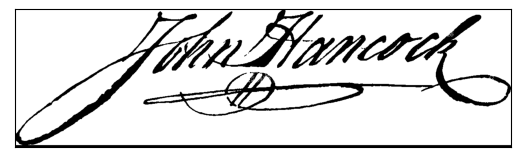

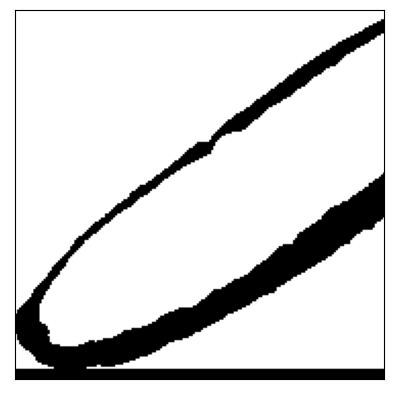

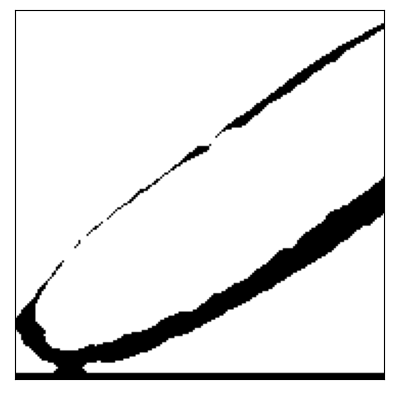

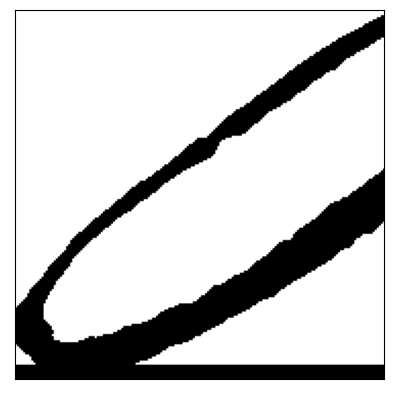

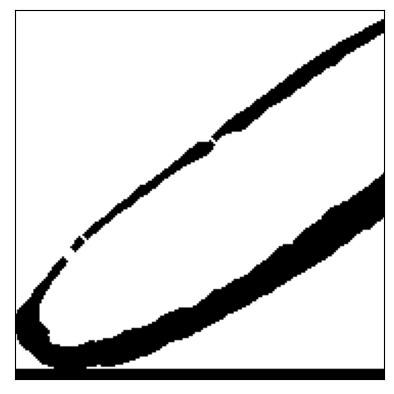

In [38]:
import matplotlib.pyplot as plt 
import numpy as np



img = cv2.imread('JhonHancoksSignature.jpg', cv2.IMREAD_UNCHANGED)


t,bin_img = cv2.threshold(img[:,:,2],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

b=bin_img[bin_img.shape[0]//2:bin_img.shape[0],0:bin_img.shape[0]//2+1]
plt.imshow(b,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

#구조 요소
se=np.uint8([[0,0,1,0,0],[0,1,1,1,0],[1,1,1,1,1],[0,1,1,1,0],[0,0,1,0,0]])

#팽창(dilation)
b_dilation = cv2.dilate(b,se,iterations=1)
plt.imshow(b_dilation, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

#침식
b_erosion = cv2.erode(b,se,iterations=1)
plt.imshow(b_erosion, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

#닫기
b_closing = cv2.erode(cv2.dilate(b,se,iterations=1),se,iterations=1)
plt.imshow(b_closing, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

#  3- 히스토그램 평활화

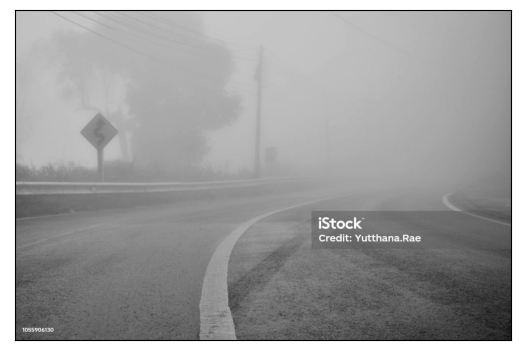

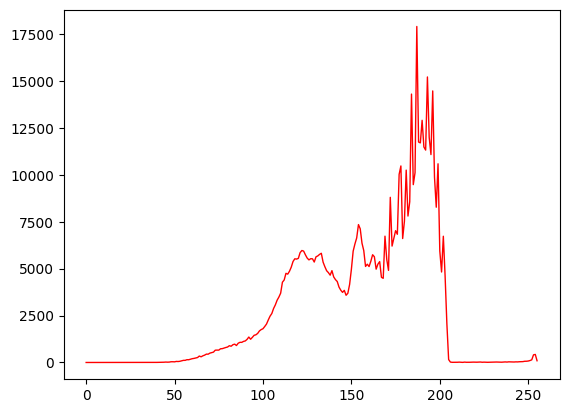

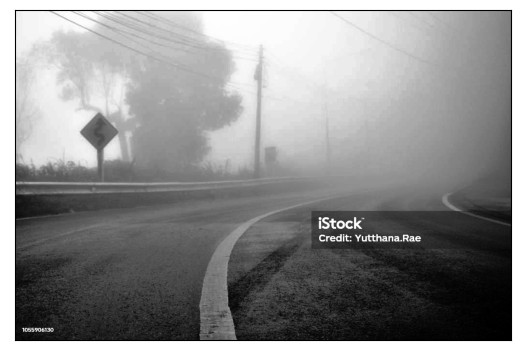

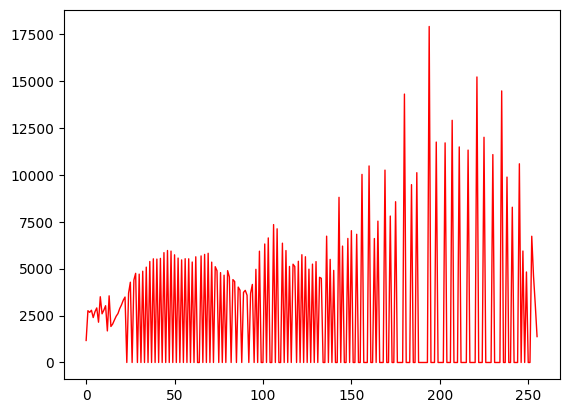

([<matplotlib.lines.Line2D at 0x26886a3e260>], None)

In [9]:
import matplotlib.pyplot as plt
img = cv2.imread('mistyroad.jpg')

gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h= cv2.calcHist([gray],[0],None, [256],[0,256])
plt.plot(h, color='r', linewidth=1), plt.show()

equal = cv2.equalizeHist(gray)
plt.imshow(equal,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h= cv2.calcHist([equal],[0],None,[256],[0,256])
plt.plot(h, color='r', linewidth=1), plt.show()

# sobel 에지 검출

In [43]:
import cv2 

img=cv2.imread("mbappe.jpeg")

# 영상 color 회색으로 바꾸기
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 소벨 연산자 적용
grad_x=cv2.Sobel(gray, cv2.CV_32F, 1,0,ksize=3)
grad_y=cv2.Sobel(gray, cv2.CV_32F,0,1,ksize=3)

# 절대값을 취해 양수 영상으로 변환
sobel_x=cv2.convertScaleAbs(grad_x)
sobel_y=cv2.convertScaleAbs(grad_y)

#에지 강도 계산
edge_strenght=cv2.addWeighted(sobel_x,0.5,sobel_y,0.5,0)

cv2.imshow("original", gray)
cv2.imshow("sobel_x", sobel_x)
cv2.imshow("sobel_y", sobel_y)
cv2.imshow("edge strenght", edge_strenght)

cv2.waitKey()
cv2.destroyAllWindows()

# 허프 변환

In [3]:
import cv2 as cv2

img=cv2.imread("apples.jpg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

apples=cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,200,param1=150,param2=20,minRadius=50,maxRadius=120)

for i in apples[0]:
    cv2.circle(img,(int(i[0]),int(i[1])),int(i[2]),(255,0,0),2)

cv2.imshow("Apple detection", img)

cv2.waitKey()
cv2.destroyAllWindows()

# 최적화 분할

In [ ]:
!pip3 install scikit-image

import skimage
import numpy as np
import cv2 as cv
import time


coffee=skimage.data.coffee()

cv2.imshow("Coffee image", cv2.cvtColor(coffee, cv2.COLOR_RGB2BGR))
slic1 = skimage.segmentation.slic(img, compactness=20, n_segments=600)
sp_img1 = skimage.segmentation.mark_boundaries(img, slic1)
sp_img1 = np.uint8(sp_img1 * 255.0)

slic2 = skimage.segmentation.slic(coffee, compactness=40, n_segments=600)
sp_img2 = skimage.segmentation.mark_boundaries(coffee, slic2)
sp_img2 = np.uint8(sp_img2 * 255.0)

cv2.imshow("Super pixels (compact 20)", cv2.cvtColor(sp_img1, cv2.COLOR_RGB2BGR))
cv2.imshow("Super pixels (compact 40)", cv2.cvtColor(sp_img2, cv2.COLOR_RGB2BGR))



cv2.waitKey()
cv2.destroyAllWindows()

# SIFT 검출

In [18]:
import cv2

img=cv2.imread('mot_color70.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift=cv2.SIFT_create()
kp,des=sift.detectAndCompute(gray,None)

gray=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('sift',gray)

k=cv2.waitKey()
cv2.destroyAllWindows()